# José Domingo Cajina Ramírez

18/03/2020

---


*   Modelo Matemático de contagio COVID-19




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress


In [0]:
!wget -cq https://raw.githubusercontent.com/Physicworld/COVID19/master/InfectadosEspa%C3%B1aMexico.csv

In [0]:
data = pd.read_csv("InfectadosEspañaMexico.csv", encoding='Latin-1', header=1)
data = pd.DataFrame(data)

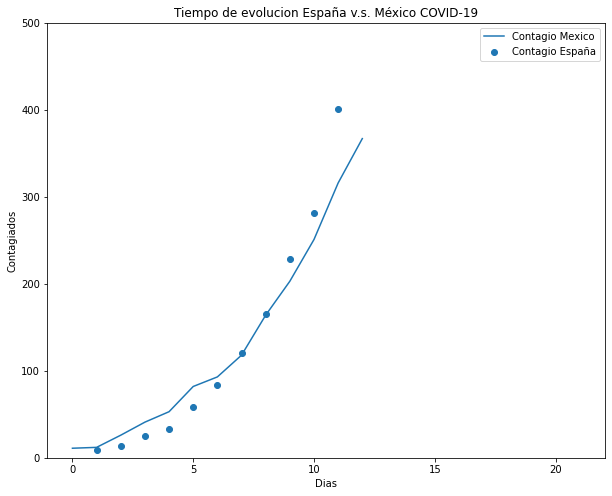

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia'],data['Casos'], label="Contagio España")
ax.plot(data['Casos_m'], label="Contagio Mexico")
#ax.plot(data['Muertos'], label="Muertos España", c="red")
plt.xlabel("Dias")
plt.ylabel("Contagiados")
plt.title("Tiempo de evolucion España v.s. México COVID-19")
plt.ylim(0,500)
plt.legend()
plt.savefig("Modelo_contagio con zoom")
plt.show()

In [25]:
x = data['Dia']
y = data['Casos']
#print(np.polyfit(x, np.log(y), 1))
print(curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(10, 0.3)))

(array([26.25444311,  0.28485121]), array([[ 3.16933320e+01, -6.08165294e-02],
       [-6.08165294e-02,  1.17602422e-04]]))


In [0]:
#y_teorica = 26.25444311exp(0.28485121x)

y_teorica = 26.25444311*np.exp(0.28485121*x)

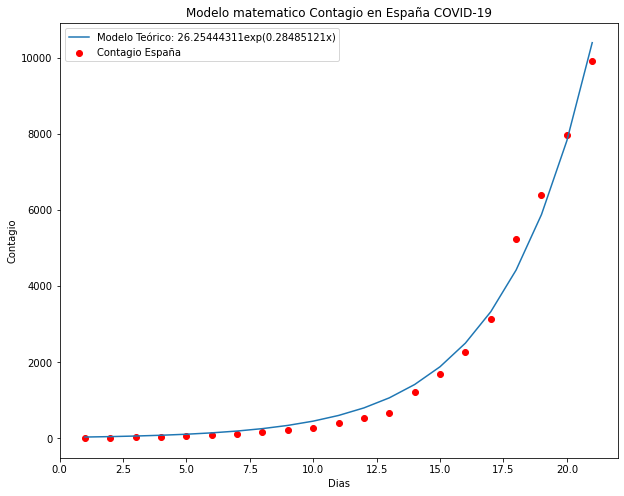

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia'],data['Casos'], label="Contagio España", c="red")
ax.plot(x, y_teorica, label = "Modelo Teórico: 26.25444311exp(0.28485121x)")
plt.xlabel("Dias")
plt.ylabel("Contagio")
plt.title("Modelo matematico Contagio en España COVID-19")
plt.legend()
plt.savefig("Modelo Matemático")
plt.show()


In [28]:
xm = data['Dia_m'].dropna()
ym = data['Casos_m'].dropna()
print(curve_fit(lambda t,a,b: a*np.exp(b*t),  xm,  ym,  p0=(4, 0.1)))

(array([18.92050361,  0.23179135]), array([[ 4.04738570e+00, -1.82781661e-02],
       [-1.82781661e-02,  8.52178035e-05]]))


In [0]:
ym_teorica =18.92050361*np.exp(0.23179135*x)

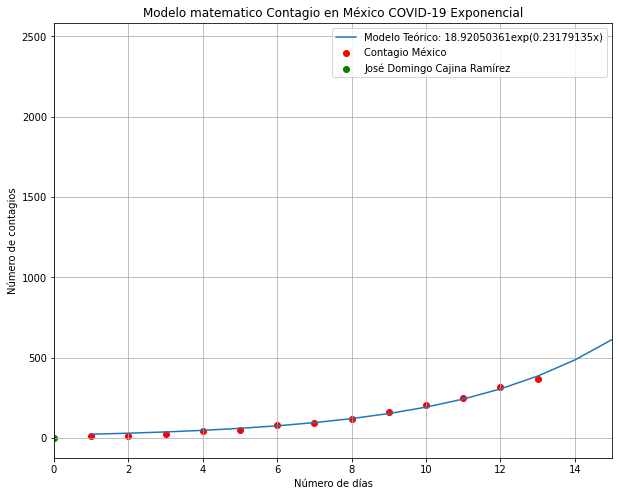

In [49]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax.scatter(data['Dia'],data['Casos_m'], label="Contagio México", c="red")
ax.plot(x, ym_teorica, label = "Modelo Teórico: 18.92050361exp(0.23179135x)")
plt.xlabel("Número de días")
plt.ylabel("Número de contagios")
plt.title("Modelo matematico Contagio en México COVID-19 Exponencial")
plt.scatter(0,0, label="José Domingo Cajina Ramírez", c="green")
plt.legend()
plt.xlim(0,15)
plt.grid()
plt.savefig("Modelo Matemático Mexico Exponencial")
plt.show()


In [50]:
ym_teorica =18.92050361*np.exp(0.23179135*14)
ym_teorica

485.57078785713395

In [0]:
 slope, intercept, r_value, p_value, std_err = linregress(xm, ym)

0.9576619040540942


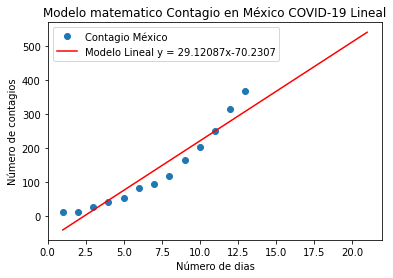

In [58]:
plt.plot(xm, ym, 'o', label='Contagio México')
plt.plot(x, intercept + slope*x, 'r', label='Modelo Lineal y = 29.12087x-70.2307')
print(r_value)
plt.title("Modelo matematico Contagio en México COVID-19 Lineal")
plt.xlabel("Número de dias")
plt.ylabel("Número de contagios")
plt.savefig("Modelo Matemático Mexico Lineal")
plt.legend()
plt.show()

In [53]:
print(intercept)
print(slope)

-70.23076923076925
29.120879120879124


In [0]:
z = np.polyfit(xm,ym,2)
p = np.poly1d(z)

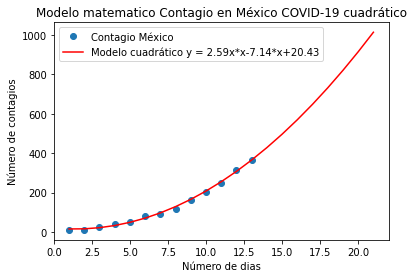

ValueError: ignored

In [64]:
plt.plot(xm, ym, 'o', label='Contagio México')
plt.plot(x, p(x), 'r', label='Modelo cuadrático y = 2.59x*x-7.14*x+20.43')
plt.title("Modelo matematico Contagio en México COVID-19 cuadrático")
plt.xlabel("Número de dias")
plt.ylabel("Número de contagios")
plt.savefig("Modelo Matemático Mexico cuadrático")
plt.legend()
plt.show()